# Homework 1

## Jake Simon

**DUE OCT 27th by 11:59PM**

Homework 1 is done in Jupyter Notebook to give you a chance to familiarize yourself to this powerful tool for data analysis. 

In Jupyter Notebook, codes and texts are executed in cells. Texts are written in Markdown cell, as you can see in the homework instructions below. Codes are written in code cells. Cells are run one at a time. You can change the cell type by navigating to Cell -> Cell Type.

There are spaces for you to enter your answers to the questions, either in code or text. Feel free to add more cells if you need (likely).

In many parts, some Scikit-learn functions and classes have already been imported to give you leads on what you may need to use. You still need to refer to the Scikit-learn documentation to learn how the classes and methods work. You can use other publicly available libraries and packages if you want, as long as they finish the work. 

You are expected to turn in a **pdf version** of this notebook with all your **codes, results, and figures**. Make sure the figures and results are visible as you want them to appear in the pdf before turning it in. Please do not modify the instructions as doing so will limit our ability to follow and grade your answers.

## Problem 1

Increase your familiarity with Github. This problem needs to be finished with a partner. Follow these steps to finish the problem:

1.   Create a github account.
2.   Create a public repository and push a helloworld.py file.
3.   Person $A$ forks Person $B$'s repo and modifies the file, then pushes to their own fork and finally creates a pull request for person B to merge.
4.   Person $B$ reviews and merges the pull request.
5.   Do the same for $A$ and $B$ reversed.

Jake's repo: https://github.com/131FinalProject/jake_repository

Gavin's repo: https://github.com/131FinalProject/pstat197a_hw1

## Problem 2

In this problem, you will consider solving the least-squared problem in two different approaches, one using Gradient Descent and the other using the formula. After that, you will compare the results you get from both approaches.

a) Load the 1-D data and the labels from **'linear_regression.csv'**. The first column contains the data values and the second column contains the labels. Store the data in a variable ***X***. Similarly, store the labels in a variable ***y***.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor

X = pd.read_csv('linear_regression.csv', header=None).iloc[:,0].values.reshape(-1,1)
y = pd.read_csv('linear_regression.csv', header=None).iloc[:,1].values.reshape(-1,1)

b) Fit a linear regression model, in the form $Ax + b$, using the formula. Print out the parameters $A$ and $b$.

In [3]:
lin_reg = LinearRegression()

lin_reg.fit(X,y)
y_hat = lin_reg.predict(X)

# Returns the A and b values from the model
A = lin_reg.coef_[0,0]
b = lin_reg.intercept_[0]
print("A = ", A)
print("b = ", b)

A =  7.526346995925662
b =  0.20313216364663322


Visualize your result in a 2-D plot. Your plot should show the data points and the line $Ax + b$.

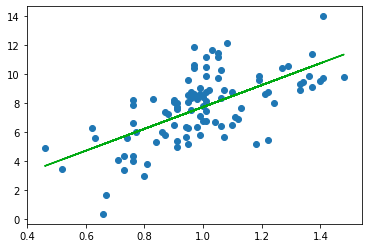

In [4]:
plt.scatter(X, y)
plt.plot(X, y_hat, color="#00aa12")
plt.show()

c) Now, fit a linear regression model using Gradient Descent. Print out the parameters $A$ and $b$.

In [5]:
grad_des = SGDRegressor()

grad_des.fit(X,y)
y_hat2 = grad_des.predict(X)

# Returns the A and b values from the model
A2 = grad_des.coef_[0]
b2 = grad_des.intercept_[0]
print("A = ", A2)
print("b = ", b2)

A =  4.43927484579895
b =  3.3303531316860004


/Users/jake/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Visualize your result in a 2-D plot similar to that in part **b**. Compare your results from both parts.

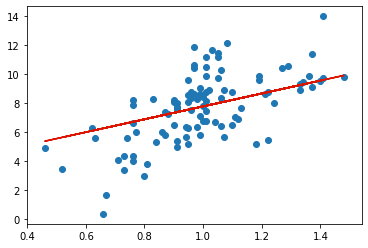

In [6]:
plt.scatter(X,y)
plt.plot(X, y_hat2, color="#dd1400")
plt.show()

<span style="color:#dd1234">
    
Linear regression gives us a higher slope (coefficent), but a lower intercept, while gradient descent gives us a higher intercept, but a lower slope (coefficent). Since linear regression takes sum of squares into account when calculating slope, the slope could be more exaggerated based on the outliers on both x and y-axes. Since gradient descent calculates weight scores for its training data, its slope would be less exaggerated by maxima and minima from the x and y-axes, causing its intercept to be closer to the mean and the slope to have a smaller magnitude to match the data cluster.

</span>

## Problem 3

In this problem, you will train classifiers using two widely used algorithms, Support Vector Machine (SVM) and Random Forest (RF). You will train and fine-tune each model using cross-validation (CV). After that, you will compare the performance of SVM and RF for this problem.

a) A 13-D dataset with labels is given in **'wine.csv'**. The last column contains the labels. Store the data and the labels in variables ***X*** and ***y***, respectively.

In [7]:
X = pd.read_csv('wine.csv', header=None).iloc[:,0:13].values # REMEMBER: Python stores indices from 0 to 13-1
y = pd.read_csv('wine.csv', header=None).iloc[:,13].values

Split the data into a train set and a test set. The size of the train set is 90% of the dataset.

In [8]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.1)

b) Find a good SVM model by performing 10-fold CV on the train set. Try different set of model parameters and record the resulting model performance during CV. Print out your best model's parameters and its performance (accuracy).

In [28]:
# A few methods to get you started with CV. 
# You are encouraged to look into the model_selection module of Scikit-learn to find tools that best fit your need.
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# ~~~~~ Gradient Boost Classifier ~~~~~
grs_pars = {}
gbc = GradientBoostingClassifier()
grs = GridSearchCV(gbc, grs_pars, cv=10)

grs.fit(Xtrain, Ytrain)
print("Gradient Boost Classifier mean test score =", grs.cv_results_['mean_test_score'].max())

# ~~~~~ SVC ~~~~~
srs_pars = {'kernel':['linear', 'poly', 'rbf'], 'gamma':['auto'], 'degree':[1,2,3,4], 'random_state':[0,1,2,3]}
svc = SVC()
srs = GridSearchCV(svc, srs_pars, cv=10)

srs.fit(Xtrain, Ytrain)
print("SVC mean test score =", srs.cv_results_['mean_test_score'].max())
srs.best_params_

/Users/jake/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Gradient Boost Classifier mean test score = 0.9625
SVC mean test score = 0.96875


/Users/jake/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'degree': 1, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 0}

Now train your best SVM model on the whole train dataset and test it on the test set. Print out your model's performance.

In [30]:
srs_best = GridSearchCV(SVC(), {'kernel':['linear'],'gamma':['auto'], 'degree':[1], 'random_state':[0]}, cv=10)
srs_best.fit(Xtrain, Ytrain)

Yhat = srs_best.predict(Xtest)

print("Test accuracy = %.5f" % accuracy_score(Ytest, Yhat))

Test accuracy = 0.83333


/Users/jake/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


c) Similarly, find a good RF model by performing 10-fold CV on the train set. Print out your best model's parameters and its performance (accuracy).

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_pars = {'n_estimators':[1,5,10,15,20], 'max_depth':[1,2,3], 'random_state':[0,1,2,3]}
rrs = GridSearchCV(rfc, rfc_pars, cv=10)

rrs.fit(Xtrain, Ytrain)
print("Random Forest Classifier mean test score =", rrs.cv_results_['mean_test_score'].max())
rrs.best_params_

Random Forest Classifier mean test score = 0.98125


/Users/jake/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 2, 'n_estimators': 10, 'random_state': 2}

Test your best RF model on the test set. Print out your model's performance.

In [60]:
best_pars = {'max_depth': [2], 'n_estimators': [10], 'random_state': [2]}
rrs_best = GridSearchCV(rfc, best_pars, cv=10)
rrs_best.fit(Xtrain, Ytrain)

Yhat_forest = rrs_best.predict(Xtest)
print("Test accuracy = %.5f" % accuracy_score(Ytest, Yhat_forest))

Test accuracy = 1.00000


/Users/jake/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


d) Compare the 2 models. Why do we need CV?

<span style="color:#dd1234">

Random forest does a better job classifying the variables in both the test and training data. However, random forest's accuracy seems to good to be true since it is 1.0000.

We need cross-validation to make sure our predictions are repeatable and not overfitted. The fewer reptitions used to validate a model, the more likely its accuracy could be overfitted to a single set of training data.

</span>

## Problem 4

### Skip for Homework 1; Save for Homework 2

In this problem, you will work on the clustering problem using Bottom-up Agglomerative clustering and K-mean clustering.

a) A 4-D dataset is given in **'iris.csv'** with the last column being the ground truth label. Load the file. Store the data in a variable ***X*** and store the label in a variable ***y***. Because clustering is an unsupervised task, there is no need for the labels during training.

b) Train a clustering model using Bottom-up Agglomerative clustering.

In [13]:
from sklearn.cluster import AgglomerativeClustering


Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color. 

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

c) Train a clustering model using K-mean clustering.

In [14]:
from sklearn.cluster import KMeans


Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color.

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

d) Perform Principle Component Analysis (PCA) on the data. Project the original data on the 2 largest principle components. Store this new projected 2-D data in a variable ***X_projected***.

In [15]:
from sklearn.decomposition import PCA


Repeat part **b** on the new 2-D data. Train the Bottom-up Agglomerative model and visualize your results.

Repeat part **c** on the new 2-D data. Train the K-means model and visualize your result.

Compare the quality of 4-D and 2-D clusterings. When would the ideas of projection and dimensionality reduction be useful?

## Problem 5

What is the hypothesis space for problems 1-3? What are the pros and cons of having a large hypothesis space? 

<span style="color:#dd1234">

The hypothesis space for problems 1-3 are the splits used by the X variables used to predict the response variable Y.

The benefit of having a large hypothesis space is that it can cover many unique data points within the data. For example, points with higher dimensionality will be more likely to be properly classified within a large hypothesis space than in a smaller hypothesis space. In addition, it can be applied to datasets with larger amounts of variables without the worrying of underfitting the data. However, the problem of having a large hypothesis space is that it can easily overfit data and misinterpret test data. For example, if a loan has certain variables that justify its usage, assigning too many hyperparameters to the space will cause similar data points to be classified very differently and take a toll on the prediction's accuracy.

</span>

## Problem 6

Suppose we find the best binary classifier for a set of red points and another binary classifier for a set of blue points. Now, suppose we are given a new set of $R$ red and $B$ blue points that we can predict to be positive or negative. If we have to choose a subset of $k$ positive points from $R$ union $B$, what would be fair way for choosing. 

You are given a red dataset in 'R.csv' and a blue dataset in 'B.csv'. There is also a third test dataset in 'RBtest.csv'.

a) Load the datasets. All datasets are 2-D with the last column containing the labels. 

In [36]:
Xtrain_r = pd.read_csv("R.csv", header=None).iloc[:,0:2].values
Ytrain_r = pd.read_csv("R.csv", header=None).iloc[:,2].values

Xtrain_b = pd.read_csv("B.csv", header=None).iloc[:,0:2].values
Ytrain_b = pd.read_csv("B.csv", header=None).iloc[:,2].values

Xtest_rb = pd.read_csv("RBtest.csv", header=None).iloc[:,0:2].values
Ytest_rb = pd.read_csv("RBtest.csv", header=None).iloc[:,2].values

b) Train 2 classifiers, one for the red dataset and the other for the blue dataset. You are free to choose the learning algorithm. 

In [53]:
# Random states
random_range = [i for i in range(0,15+1)]

# SVC (Support Vector Classifer) method:
srs_pars = {'kernel':['linear'], 'gamma':['auto'], 'degree':[1,2,3,4], 'random_state':random_range}
svc = SVC()
srs = GridSearchCV(svc, srs_pars, cv=10)

# Gradient Boost Classifier method:
grs_pars = {'n_estimators':[5,10,15,20,25,30], 'max_depth':[1,2,3,4], 'random_state':random_range}
gbc = GradientBoostingClassifier()
grs = GridSearchCV(gbc, grs_pars, cv=10)

# Random Forest Classifier method:
rfc = RandomForestClassifier()
rfc_pars = {'n_estimators':[5,10,15,20,25,30], 'max_depth':[1,2,3,4], 'random_state':random_range}
rrs = GridSearchCV(rfc, rfc_pars, cv=10)

# Fit methods to the red training dataset:
srs.fit(Xtrain_r, Ytrain_r)
grs.fit(Xtrain_r, Ytrain_r)
rrs.fit(Xtrain_r, Ytrain_r)

print("Mean Test Scores for the red training dataset:")
print("SVC (Support Vector Classifier): %.4f" % srs.cv_results_['mean_test_score'].max())
print("Gradient Boost Classifier: %.4f" % grs.cv_results_['mean_test_score'].max())
print("Random Forest Classifier: %.4f" % rrs.cv_results_['mean_test_score'].max())
print("")
print("Best parameters for each classifier:")
print("SVC (Support Vector Classifier): ", srs.best_params_)
print("Gradient Boost Classifier: ", grs.best_params_)
print("Random Forest Classifier: ", rrs.best_params_)

print("")

# Fit methods to the red training dataset:
srs.fit(Xtrain_b, Ytrain_b)
grs.fit(Xtrain_b, Ytrain_b)
rrs.fit(Xtrain_b, Ytrain_b)

print("Mean Test Scores for the blue training dataset:")
print("SVC (Support Vector Classifier): %.4f" % srs.cv_results_['mean_test_score'].max())
print("Gradient Boost Classifier: %.4f" % grs.cv_results_['mean_test_score'].max())
print("Random Forest Classifier: %.4f" % rrs.cv_results_['mean_test_score'].max())
print("")
print("Best parameters for each classifier:")
print("SVC (Support Vector Classifier): ", srs.best_params_)
print("Gradient Boost Classifier: ", grs.best_params_)
print("Random Forest Classifier: ", rrs.best_params_)

/Users/jake/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/jake/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/jake/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean Test Scores for the red training dataset:
SVC (Support Vector Classifier): 0.8875
Gradient Boost Classifier: 0.9062
Random Forest Classifier: 0.9062

Best parameters for each classifier:
SVC (Support Vector Classifier):  {'degree': 1, 'gamma': 'auto', 'kernel': 'linear', 'random_state': 0}
Gradient Boost Classifier:  {'max_depth': 3, 'n_estimators': 15, 'random_state': 0}
Random Forest Classifier:  {'max_depth': 3, 'n_estimators': 5, 'random_state': 10}



/Users/jake/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean Test Scores for the blue training dataset:
SVC (Support Vector Classifier): 0.8750
Gradient Boost Classifier: 0.8625
Random Forest Classifier: 0.8875

Best parameters for each classifier:
SVC (Support Vector Classifier):  {'degree': 1, 'gamma': 'auto', 'kernel': 'linear', 'random_state': 0}
Gradient Boost Classifier:  {'max_depth': 1, 'n_estimators': 5, 'random_state': 0}
Random Forest Classifier:  {'max_depth': 1, 'n_estimators': 10, 'random_state': 3}


/Users/jake/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


c) Now use your models to classify instances in the test dataset. The models may agree on many points but may also disagree on many other points. Let's call the set of positive points classified by the red model $P_r$ and the set of positive points classified by the blue model $P_b$. You are asked to pick out $k$ points from the set $P_r \cup P_b$. What is a fair way to do this? Demonstrate your answer with code and visualizations. 

In [54]:
rrs_best = GridSearchCV(rfc, {'max_depth': [3], 'n_estimators': [5], 'random_state': [10]}, cv=10)
rrs_best.fit(Xtrain_r, Ytrain_r)
Yhat_rb = rrs_best.predict(Xtest_rb)
print("Test accuracy using red's best classifier = %.5f" % accuracy_score(Ytest_rb, Yhat_rb))

rrs_best = GridSearchCV(rfc, {'max_depth': [1], 'n_estimators': [10], 'random_state': [3]}, cv=10)
rrs_best.fit(Xtrain_b, Ytrain_b)
Yhat_rb = rrs_best.predict(Xtest_rb)
print("Test accuracy using blue's best classifier = %.5f" % accuracy_score(Ytest_rb, Yhat_rb))

Test accuracy using red's best classifier = 0.80000
Test accuracy using blue's best classifier = 0.85000


/Users/jake/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/jake/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
